## Predicting Diabetes

In [ ]:
#import the dataset
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('diabetesdataset.csv')

In [3]:
print(df.tail())


      ID  pregnant  glucose  pressure  triceps  insulin  mass  pedigree  age  \
763  764        10      101        76       48      180  32.9     0.171   63   
764  765         2      122        70       27        0  36.8     0.340   27   
765  766         5      121        72       23      112  26.2     0.245   30   
766  767         1      126        60        0        0  30.1     0.349   47   
767  768         1       93        70       31        0  30.4     0.315   23   

    diabetes  
763      neg  
764      neg  
765      neg  
766      pos  
767      neg  


In [4]:
df.shape

(768, 10)

In [5]:
df.isnull().sum()

ID          0
pregnant    0
glucose     0
pressure    0
triceps     0
insulin     0
mass        0
pedigree    0
age         0
diabetes    0
dtype: int64

In [6]:
diabets_map={"pos":1,"neg":0}

In [7]:
df['diabetes'] = df['diabetes'].map(diabets_map)

In [8]:
df.head()

,ID,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.columns

Index(['ID', 'pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age', 'diabetes'],
      dtype='object')

In [10]:
df[['ID', 'pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age']]=df[['ID', 'pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age']].replace(0,np.NaN)

In [11]:
df.isnull().sum()

ID            0
pregnant    111
glucose       5
pressure     35
triceps     227
insulin     374
mass         11
pedigree      0
age           0
diabetes      0
dtype: int64

In [12]:
df.fillna(df.mean(),inplace=True)

In [13]:
df.isnull().sum()

ID          0
pregnant    0
glucose     0
pressure    0
triceps     0
insulin     0
mass        0
pedigree    0
age         0
diabetes    0
dtype: int64

In [14]:
feature_columns=['ID', 'pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass', 'pedigree', 'age']
predicted_values=['diabetes']

In [15]:
X=df[feature_columns].values
Y=df[predicted_values].values

In [16]:
print(type(Y))

<class 'numpy.ndarray'>


In [17]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
print(mean_x)
print(mean_y)

92.66205422697978
0.3489583333333333


In [18]:
m = len(X)
print(m)

768


In [19]:
# Total number of values (y = b0 + b1*x) (y = m*x + c)   
# Using the formula to calculate b1 and b0
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

In [20]:
# Print coefficients
print(b1, b0)

[-3.55471505e-05  4.52121510e-05  4.04297041e-03  1.71957070e-03
  2.19325246e-04  7.77104214e-04  2.78202456e-04  3.22813829e-06
  3.63917277e-04] [ 0.35225221  0.34476888 -0.02567161  0.18961938  0.32863521  0.27695026
  0.32317952  0.34865921  0.31523701]


In [21]:
# Plotting Values and Regression Line
max_x = np.max(X) 
min_x = np.min(X) 
print(max_x)
print(min_x)
# Calculating line values x and y
#x = np.linspace(min_x, max_x, 1000000)
#y =  b0 + b1 * x

846.0
0.078


In [22]:
df_3 = pd.DataFrame(df,columns = df.columns)

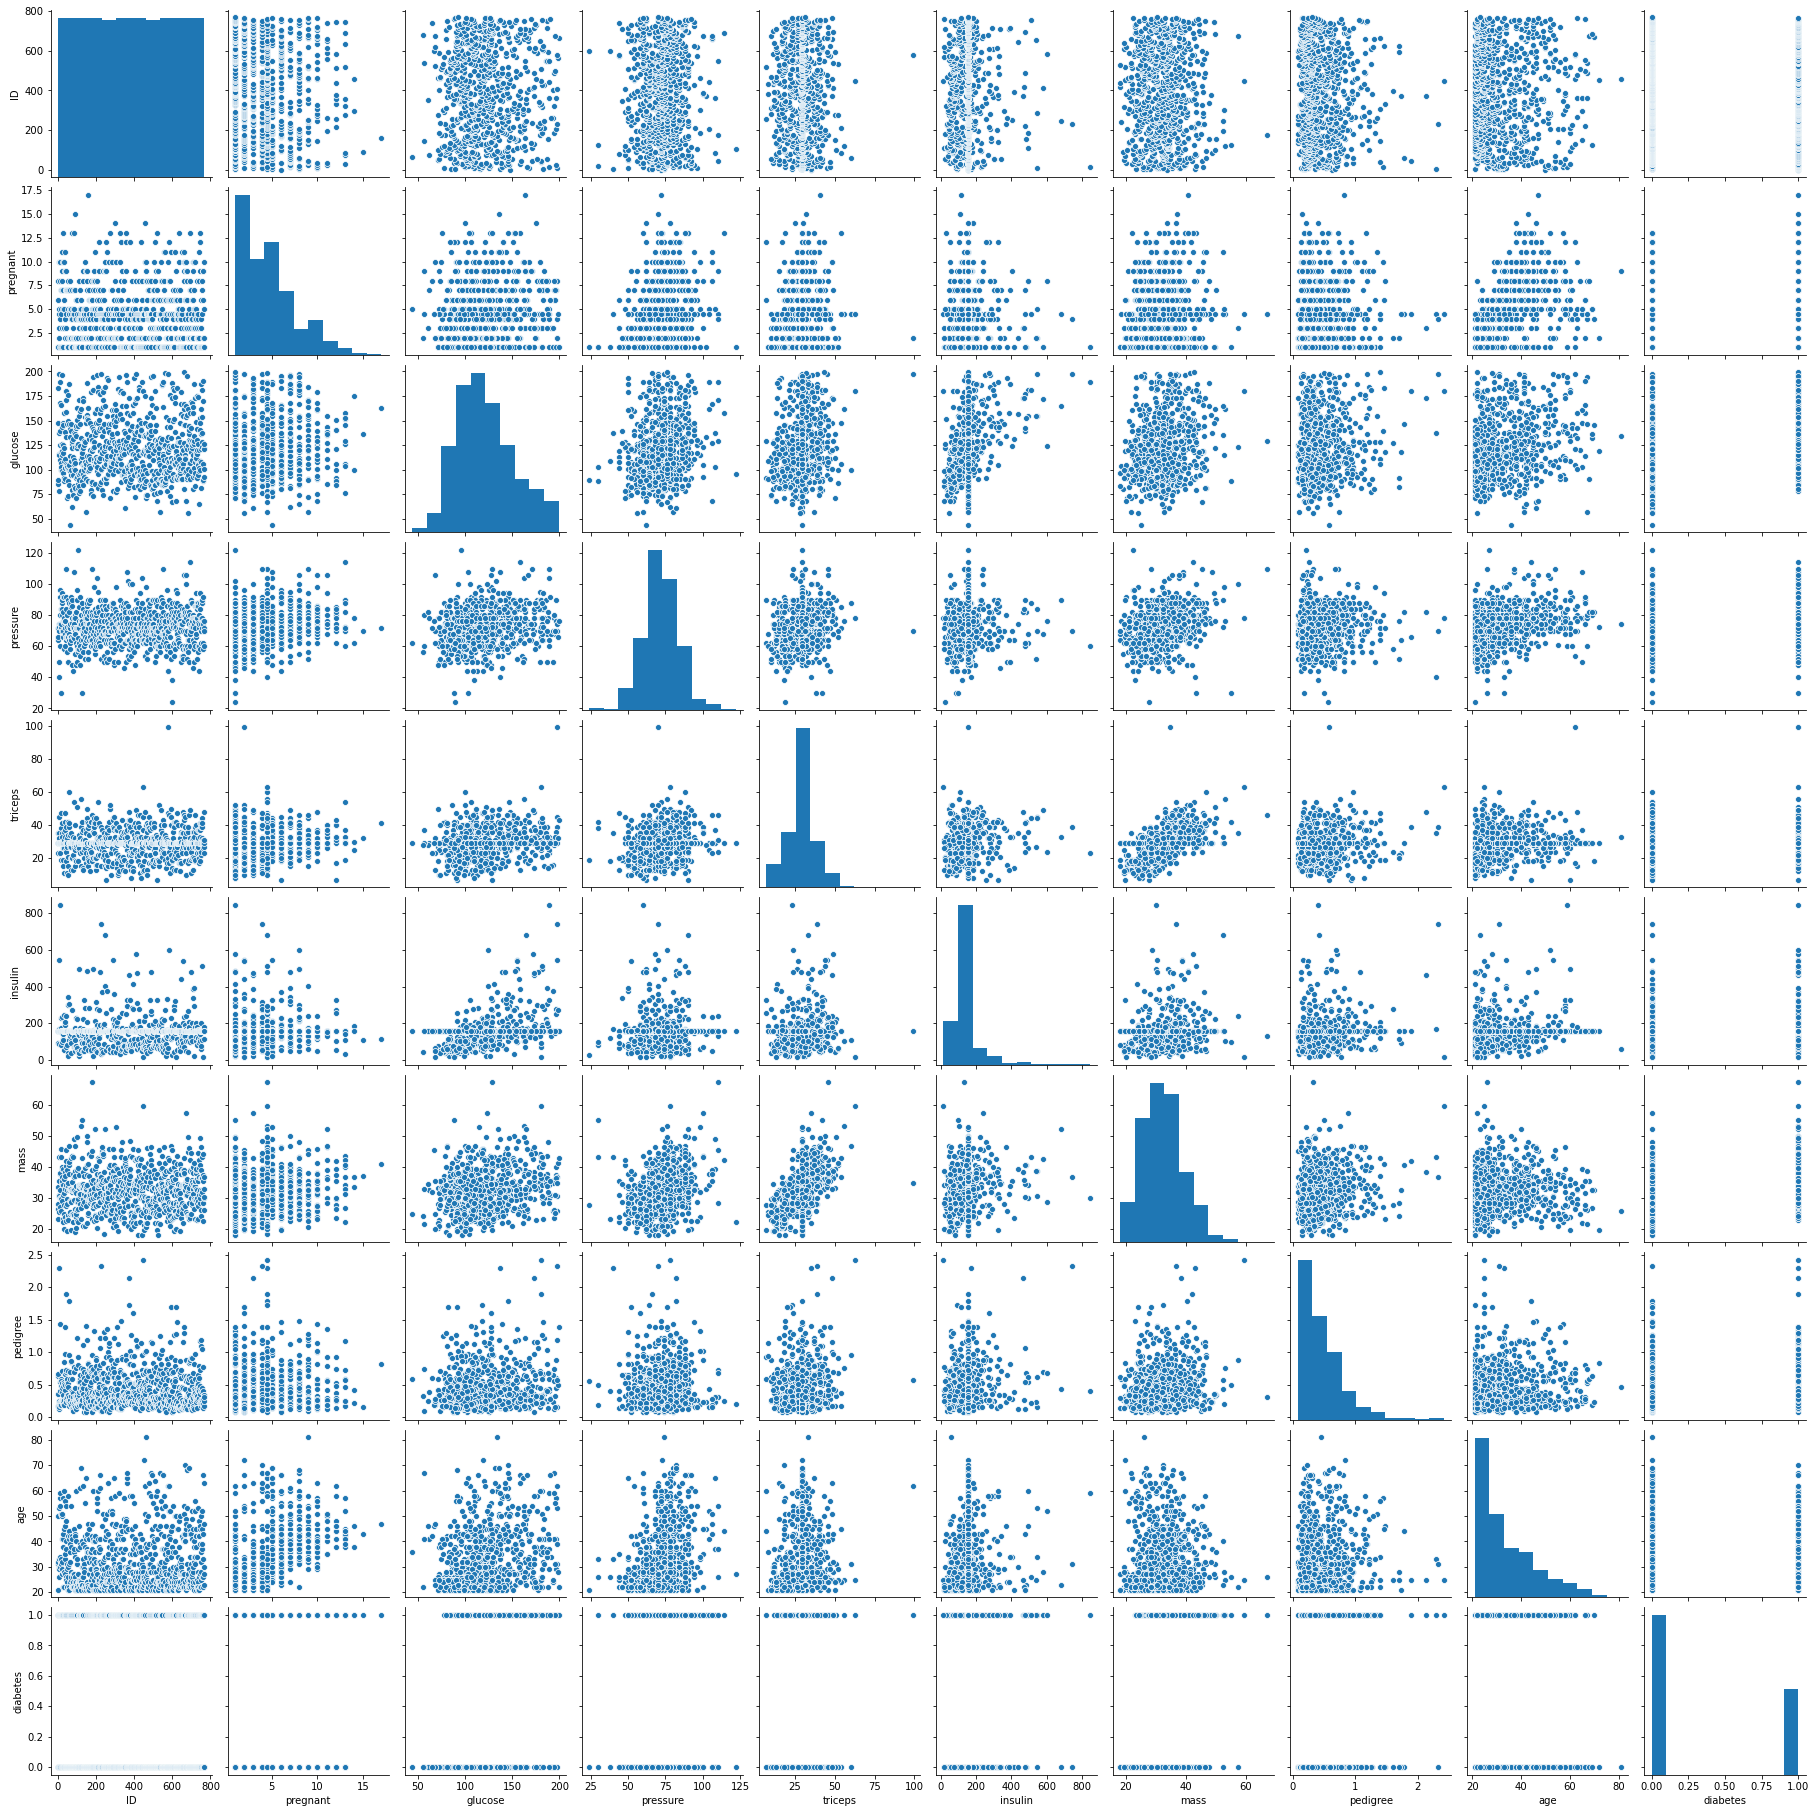

In [24]:
sns.pairplot(df[['ID', 'pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age', 'diabetes']])

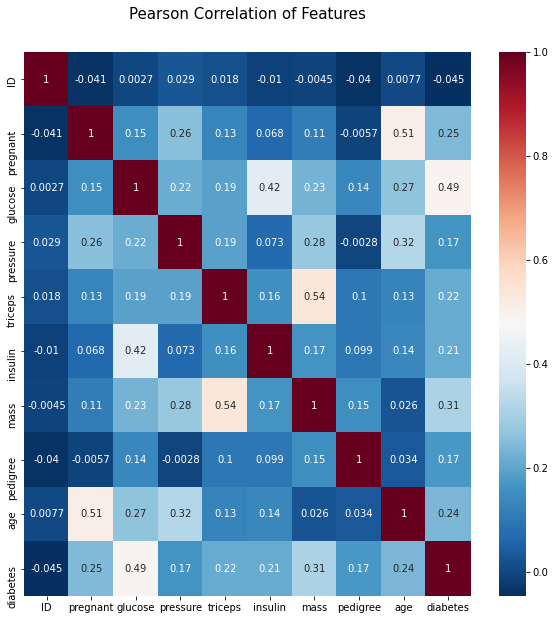

In [25]:
correlation = df.corr()
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation, annot=True, cmap="RdBu_r")

In [26]:
dataset_final = df[['glucose','mass','age','pregnant','diabetes']]

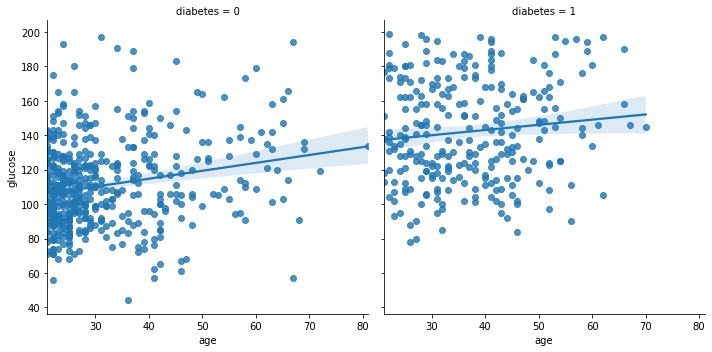

In [27]:
sns.lmplot(x = "age", y = "glucose", col = "diabetes", data = dataset_final)

In [28]:
# Calculating Root Mean Squares Error
#It indicates the absolute fit of the model 
mse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    mse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(mse/m)
print(rmse)

[0.47646268 0.47662407 0.44530252 0.47491154 0.47643329 0.46950892
 0.47634256 0.47664067 0.47613077]


In [29]:
# R-squared is a relative measure of fit
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

[7.47088626e-04 7.00224890e-05 1.27173463e-01 7.24270700e-03
 8.70346862e-04 2.97015342e-02 1.25088806e-03 3.89849342e-07
 2.13880159e-03]


## Linear regression using sciket library

In [30]:
# Reading Data
df= pd.read_csv('diabetesdataset.csv')

In [31]:
feature_columns=['ID', 'pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass', 'pedigree', 'age']
predicted_values=['diabetes']

In [32]:
diabets_map={"pos":1,"neg":0}

In [33]:
df['diabetes'] = df['diabetes'].map(diabets_map)

In [34]:
df[['ID', 'pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age']]=df[['ID', 'pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age']].replace(0,np.NaN)

In [35]:
df.isnull().sum()

ID            0
pregnant    111
glucose       5
pressure     35
triceps     227
insulin     374
mass         11
pedigree      0
age           0
diabetes      0
dtype: int64

In [36]:
df.fillna(df.mean(),inplace=True)

In [37]:
df.isnull().sum()

ID          0
pregnant    0
glucose     0
pressure    0
triceps     0
insulin     0
mass        0
pedigree    0
age         0
diabetes    0
dtype: int64

In [38]:
df.head(20)

,ID,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,6.000000,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,2,1.000000,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,3,8.000000,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,4,1.000000,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,5,4.494673,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,6,5.000000,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,7,3.000000,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,8,10.000000,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,9,2.000000,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,10,8.000000,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [39]:
df['diabetes']=df['diabetes'].astype(str)

In [40]:
X=df[feature_columns].values
Y=df[predicted_values].values

In [41]:
print(X.ndim)

2


In [42]:
# Creating Model
#import LinearRegression class from sklearn.linear_model, instantiate it, and call the fit() method along with 
# our training data
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
print(reg)

LinearRegression()


In [43]:
# Fitting training data
reg = reg.fit(X, Y)
print(reg)

LinearRegression()


In [44]:
# Y Prediction call the predict() method to predict
Y_pred = reg.predict(X)
print(Y_pred)

[[ 6.60754031e-01]
 [-2.79104491e-02]
 [ 7.59542046e-01]
 [-2.55977467e-02]
 [ 8.88786165e-01]
 [ 2.15592883e-01]
 [ 3.40279129e-02]
 [ 4.44450867e-01]
 [ 7.63658101e-01]
 [ 4.69243767e-01]
 [ 2.92756368e-01]
 [ 8.82625847e-01]
 [ 7.08783003e-01]
 [ 7.09928220e-01]
 [ 6.39222511e-01]
 [ 2.58590675e-01]
 [ 5.21478159e-01]
 [ 2.65049223e-01]
 [ 3.55347461e-01]
 [ 2.97856080e-01]
 [ 4.52258177e-01]
 [ 3.66060348e-01]
 [ 1.00547348e+00]
 [ 3.67723952e-01]
 [ 7.07083987e-01]
 [ 4.95504993e-01]
 [ 6.83847873e-01]
 [-6.66816489e-03]
 [ 5.98165918e-01]
 [ 3.49247401e-01]
 [ 4.27021927e-01]
 [ 5.87116847e-01]
 [-8.07074772e-03]
 [-2.72173762e-02]
 [ 4.62491965e-01]
 [ 2.03456771e-01]
 [ 6.29748491e-01]
 [ 4.08753340e-01]
 [ 1.90826836e-01]
 [ 5.29690884e-01]
 [ 7.13684645e-01]
 [ 6.31710297e-01]
 [ 1.76889826e-01]
 [ 9.94812630e-01]
 [ 6.08943717e-01]
 [ 1.04599578e+00]
 [ 4.38380491e-01]
 [-7.97713378e-02]
 [ 3.88873535e-01]
 [ 2.79356948e-01]
 [-3.54151374e-02]
 [ 7.65132868e-02]
 [ 5.3462038

In [45]:
# Calculating RMSE and R2 Score
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)
print(mse)
print(rmse)
print(r2_score)

0.15407689798433932
0.3925263022834767
0.3218040874872019
